In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

## Simple Step

As in text!

In [64]:
nx = 10
ny = 6
np.set_printoptions(precision=2, floatmode='fixed')
x = np.arange(0, nx)
y = np.arange(0, ny)
X, Y = np.meshgrid(x, y)
psi = X * 0.0
#  boudnary conditions:
doit = True
nn = 0
for a in range(10):
    
    psi[-1, :] = 1
    psi[0, :] = 0
    # step:
    psi[:, int(nx/2):][:int(ny/2), :] = 0
    # upstream/downstream
    psi[:, 0] = np.linspace(0, 1, ny)
    psi[:, -1][int(ny/2)-1:] = np.linspace(0, 1, ny/2+1)
    if nx<20:
        print(f'Step {a}')
        print(psi)
    psinew = psi
    psinew[1:-1, :][:, 1:-1] = 0.25* (psi[2:,:][:, 1:-1] + psi[:-2,:][:, 1:-1] + psi[1:-1, :][:, :-2] + psi[1:-1, :][:, 2:])
    psi = psinew

Step 0
[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.20 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.40 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.60 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.33]
 [0.80 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.67]
 [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00]]
Step 1
[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.20 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.40 0.10 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.60 0.15 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.33]
 [0.80 0.45 0.25 0.25 0.25 0.25 0.25 0.25 0.42 0.67]
 [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00]]
Step 2
[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.20 0.08 0.01 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.40 0.15 0.03 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.60 0.29 0.10 0.06 0.06 0.06 0.06 0.08 0.19 0.33]
 [0.80 0.55 0.42 0.38 0.38 0.38 0.38 0.42 0.50 0.67]
 [1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00 1.00]]
Step 3
[[0.00 0.00 0.0

/Users/jklymak/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


<IPython.core.display.Javascript object>


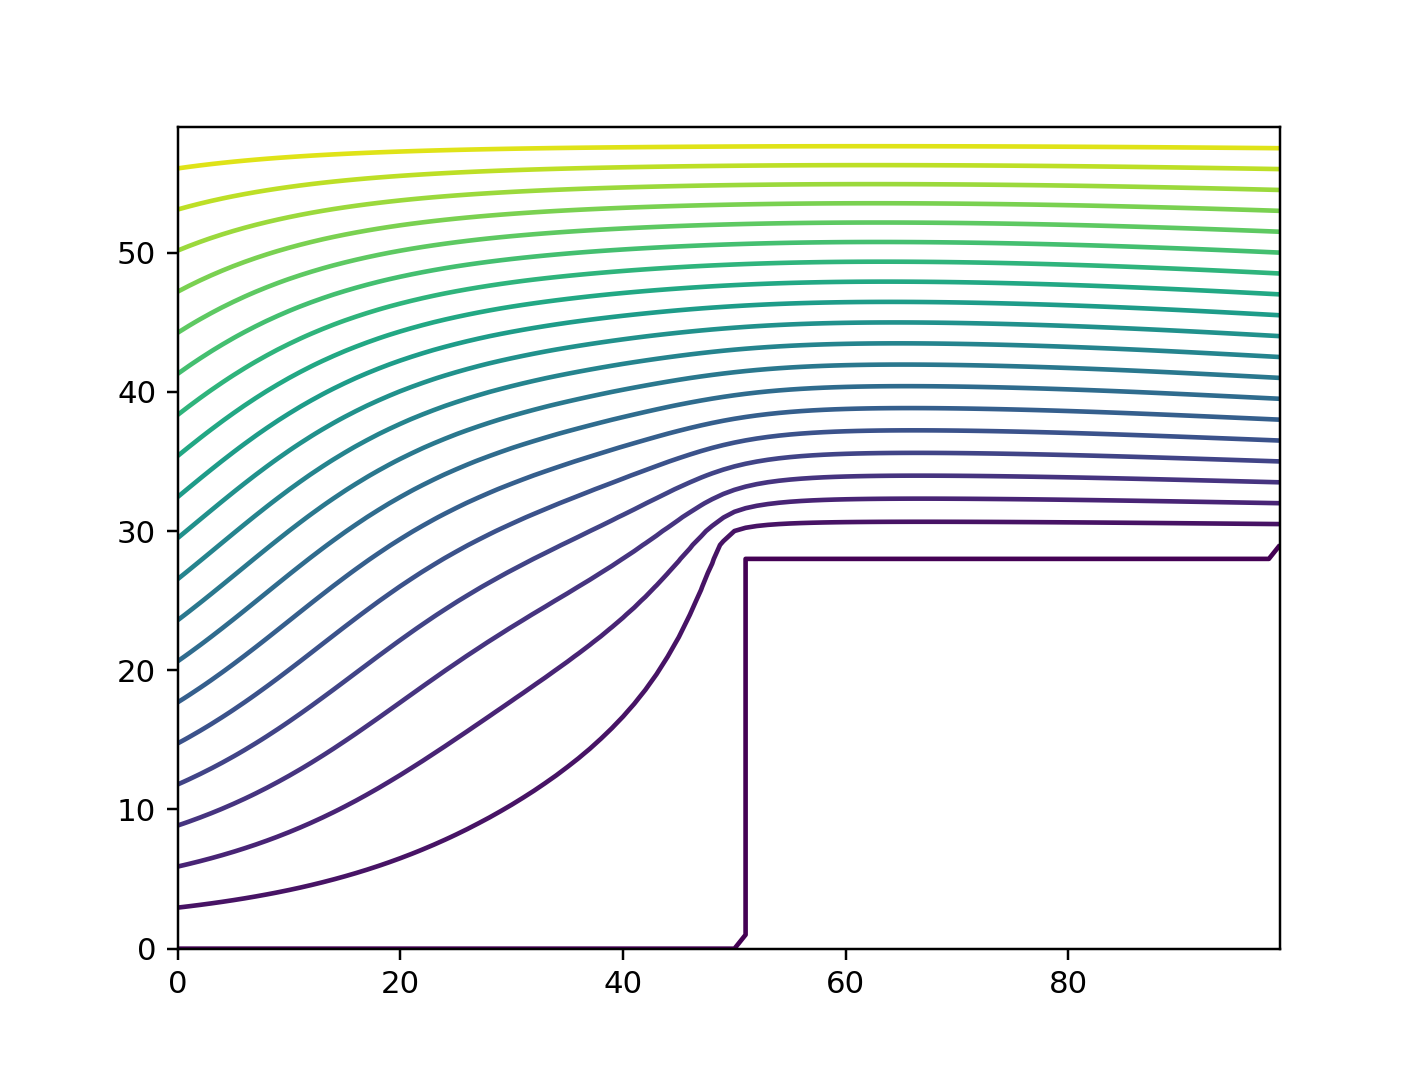

In [62]:
fig, ax = plt.subplots()
ax.contour(x, y, psi, levels=20, vmin=0, vmax=1)

In [14]:
nx = 300
nz = 100
nx = 3*nz
x = np.arange(0.,3.,3./nx)
z = np.arange(0.,1.+1./nz,1./nz)
x = x-x[-1]/3.
z = z-z[-1]/2.

x1 = 0.
z1 = -0.5
r1 = 20./50.

x2 = 40./50.
z2 = -0.5
r2 = 14./50

X,Z = np.meshgrid(x,z)
# where is the circle?
in1= np.where(np.sqrt((X-x1)**2+(Z-z1)**2)<=r1);
minx1 = np.argmin(in1[1])
leadx1 = in1[1][minx1]
leadz1 = in1[0][minx1]
# where is the second circle?
in2= np.where(np.abs(X-x2+1j*(Z-z2))<=r2);

<IPython.core.display.Javascript object>


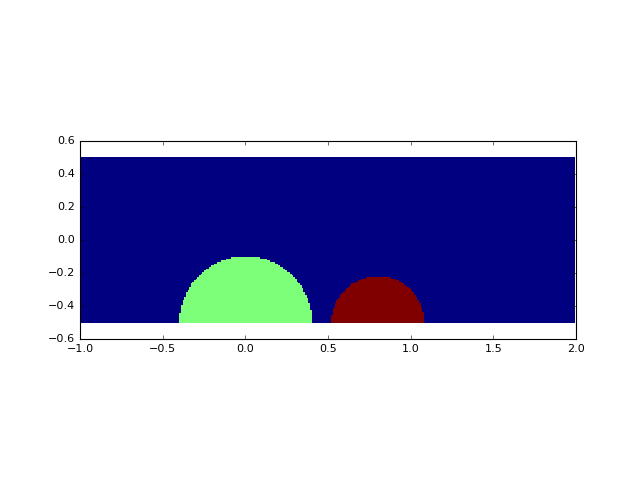

In [3]:
# plot and make sure OK
A=0.*Z
A[in1]=1.
A[in2]=2.
fig,ax=plt.subplots()
ax.pcolormesh(x,z,A,rasterized=True)
ax.set_aspect(1.)

<IPython.core.display.Javascript object>


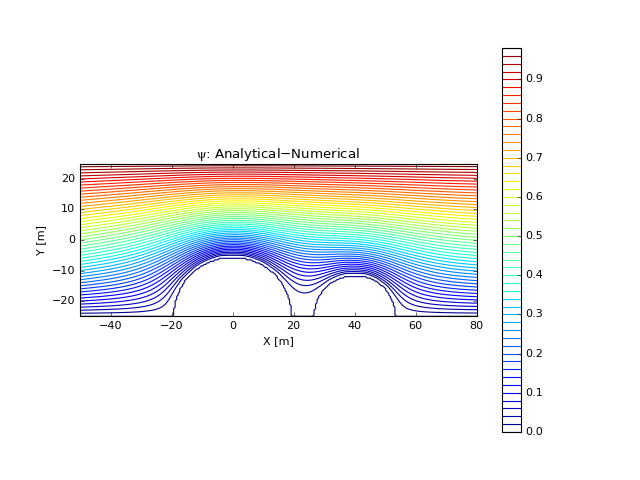

In [13]:
psiold = X*0. # just to compare w/ psinew every iteration...
# initializes as if no obstacles:  i.e. psi[z]=z+0.5 =0 at bottom, 1 at top
psinew = Z.copy()+0.5
    
fig,axs=plt.subplots()
try:
    axs=axs.flatten()
except:
    axs = [axs]
psi = [[],[],[],[]]
numit=np.zeros(4)
for nn,tol in enumerate([1.e-6,]):
    ax=axs[nn]
    maxdiff=1.
    # initialize to be a free stream
    num=0
    while (maxdiff>tol):
        num+=1
        # set psi in the body to a value at the boundary of the body.
        psinew[in1]=0.
        psinew[in2]=0.
        # do the integration:
        psinew[1:-1,1:-1]=0.25*(psinew[0:-2,1:-1]+psinew[2:,1:-1]+
                                psinew[1:-1,0:-2,]+psinew[1:-1,2:])
        maxdiff = np.max(np.abs(psinew-psiold))
        psiold=psinew.copy()
    pc=ax.contour(x*50.,z*50.,psinew,np.arange(0.,1.,0.02))
    fig.colorbar(pc,ax=ax)
    ax.set_aspect(1.)
    ax.set_ylim([-25,25])
    ax.set_xlim([-50,80])
    ax.set_xlabel('X [m]')
    ax.set_ylabel('Y [m]')
    
    psi[nn]=psinew.copy()
    numit[nn]=num
    ax.set_title('$\psi$: Analytical-Numerical ')

<IPython.core.display.Javascript object>


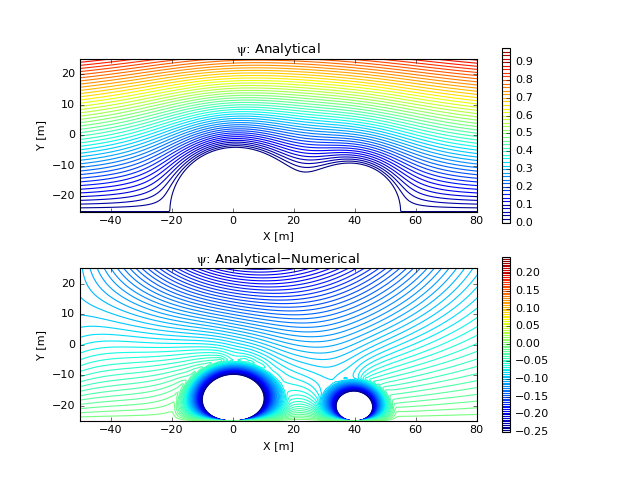

In [12]:
# get the analytic solution:
zz = X+1j*Z
comp = zz+r1**2/(zz-(x1+1j*z1))+r2**2/(zz-(x2+1j*z2))
fig,axs=plt.subplots(2,1)
ax = axs[0]
pc=ax.contour(x*50.,z*50.,np.imag(comp-comp[0,0]),np.arange(0.,1.,0.02))
fig.colorbar(pc,ax=ax)
ax.set_aspect(1.)
ax.set_ylim([-25,25])
ax.set_xlim([-50,80])
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('$\psi$: Analytical')
ax=axs[1]
pc=ax.contour(x*50.,z*50.,np.imag(comp-comp[0,0])-psi[0],np.arange(-1.,1.,0.02)/4.)
fig.colorbar(pc,ax=ax)
ax.set_aspect(1.)
ax.set_ylim([-25,25])
ax.set_xlim([-50,80])
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('$\psi$: Analytical-Numerical ')

Note the differences are mostly along the upper boundary.  The analytical solution has no upper boundary, so the flow is still going around the obstacles at the top of the domain.  Otherwise the responses are quite similar.  